In [6]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sys
from subprocess import run, call, Popen, PIPE
import os
from time import time, sleep
from helpers import *

In [7]:
primesList = pd.read_csv('1m.csv').iloc[:, 1]
print(primesList.head())

primesList = primesList.iloc[:-1]


Keys_dict = []


for i in range(0, len(primesList), 2):
    p = primesList.iloc[i]
    q = primesList.iloc[i+1]
    n = p*q
    length = len(bin(n)[2:])

    e = Calc_e(p, q)
   
    Keys_dict.append((p,q,e,n,length))



0     2
1     3
2     5
3     7
4    11
Name: Num, dtype: int64


In [8]:
BreakTimes = []
KeyLengths = []


for i, key_to_be_broken in enumerate(Keys_dict):
    if(i > 30):
        break

    initial_n = key_to_be_broken[3]
    initial_length = key_to_be_broken[4]
    KeyLengths.append(initial_length)

    startTime = time()*1000

    

    #Generate prime list till the max number n
    primesList = constructPrimeList(initial_n)

    found = False
    for i in range(0, len(primesList)):
        for j in range(0, len(primesList)):
            if primesList[i] * primesList[j] == initial_n:
                found = True
                p = primesList[i]
                q = primesList[j]
                break
        
        if(found):
            break
    
    if(found):
        phi = (p-1) * (q-1)
        d = modInverse(e, phi)
    endTime = time()*1000

    BreakTimes.append(endTime-startTime)


In [9]:
#this is just to take the average time of numbers having the same key length

graph_data = {}

for i,j in zip(KeyLengths, BreakTimes):
    if i in graph_data.keys():
        graph_data[i] = (graph_data[i] + j) / 2
    else:
        graph_data[i] = j

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


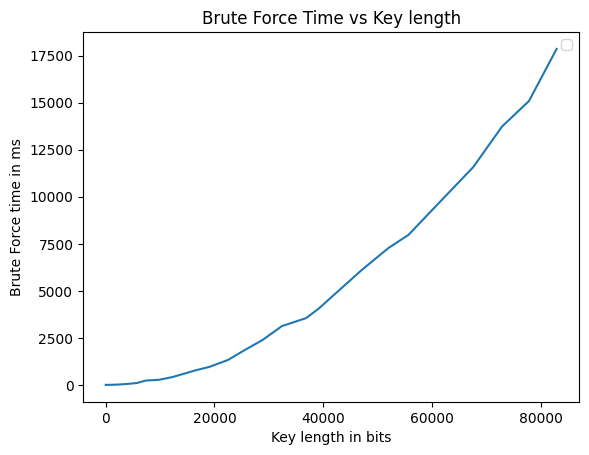

In [10]:
plt.plot(graph_data.keys(), graph_data.values())
plt.xlabel("Key length in bits")
plt.ylabel("Brute Force time in ms")
plt.title('Brute Force Time vs Key length')
plt.legend()
plt.savefig('BFTime.png')
plt.show()